In [3]:
!wget --no-check-certificate "https://cloud-platform.eurecom.fr/zoe/proxy/2225fa1d017899f31effc9f51a259a69fdf9e8bc2749d13abbdba004762d1353/files/AML/Plankton_Image_Classification/metaDF_NA.pkl"

--2019-04-28 11:25:45--  https://cloud-platform.eurecom.fr/zoe/proxy/2225fa1d017899f31effc9f51a259a69fdf9e8bc2749d13abbdba004762d1353/files/AML/Plankton_Image_Classification/metaDF_NA.pkl
Resolving cloud-platform.eurecom.fr (cloud-platform.eurecom.fr)... 193.55.113.84
Connecting to cloud-platform.eurecom.fr (cloud-platform.eurecom.fr)|193.55.113.84|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 105525 (103K) [application/octet-stream]
Saving to: ‘metaDF_NA.pkl’

metaDF_NA.pkl       100%[===================>] 103.05K   336KB/s    in 0.3s    

2019-04-28 11:25:45 (336 KB/s) - ‘metaDF_NA.pkl’ saved [105525/105525]



<h3>Algorithmic Machine Learning Challenge</h3>
<h1>Plankton Image Classification</h1>
<hr style="height:2px;border:none;color:#333;background-color:#333;"/>

Plankton comprises all the organisms freely drifting with ocean currents. These life forms are a critically important piece of oceanic ecosystems, accounting for more than half the primary production on earth and nearly half the total carbon fixed in the global carbon cycle. They also form the foundation of aquatic food webs, including those of large, commercially important fisheries. Loss of plankton populations could result in ecological upheaval as well as negative societal impacts, particularly in indigenous cultures and the developing world. Plankton’s global significance makes their population levels an ideal measure of the health of the world’s oceans and ecosystems.

Traditional methods for measuring and monitoring plankton populations are time consuming and cannot scale to the granularity or scope necessary for large-scale studies. Improved approaches are needed. One such approach is through the use of underwater imagery sensors. 

In this challenge, which was prepared in cooperation with the Laboratoire d’Océanographie de Villefranche, jointly run by Sorbonne Université and CNRS, plankton images were acquired in the bay of Villefranche, weekly since 2013 and manually engineered features were computed on each imaged object. 

This challenge aims at developing solid approaches to plankton image classification. We will compare methods based on carefully (but manually) engineered features, with “Deep Learning” methods in which features will be learned from image data alone.

The purpose of this challenge is for you to learn about the commonly used paradigms when working with computer vision problems. This means you can choose one of the following paths:

- Work directly with the provided images, e.g. using a (convolutional) neural network
- Work with the supplied features extracted from the images (*native* or *skimage* or both of them)
- Extract your own features from the provided images using a technique of your choice

You will find a detailed description about the image data and the features at the end of this text.
In any case, the choice of the classifier that you decide to work with strongly depends on the choice of features.

Please bear in mind that the purpose of this challenge is not simply to find the best-performing model that was released on e.g. Kaggle for a similar problem. You should rather make sure to understand the dificulties that come with this computer vision task. Moreover, you should be able to justify your choice of features/model and be able to explain its advantages and disadvantages for the task.

# Overview
<hr style="height:1px;border:none;color:#333;background-color:#333;" />    

Beyond simply producing a well-performing model for making predictions, in this challenge we would like you to start developing your skills as a machine learning scientist.
In this regard, your notebook should be structured in such a way as to explore the five following tasks that are expected to be carried out whenever undertaking such a project.
The description below each aspect should serve as a guide for your work, but you are strongly encouraged to also explore alternative options and directions. 
Thinking outside the box will always be rewarded in these challenges.

<div class="">
    <h3>1. Data Exploration</h3>
</div>

The first broad component of your notebook should enable you to familiarise yourselves with the given data, an outline of which is given at the end of this challenge specification.

What is new in this challenge is that you will be working with image data. Therefore, you should have a look at example images located in the *imgs.zip* file (see description below). If you decide to work with the native or the skimage features, make sure to understand them!

Among others, this section should investigate:

- Distribution of the different image dimensions (including the number of channels)
- Distribution of the different labels that the images are assigned to

The image labels are organized in a taxonomy. We will measure the final model performance for the classification into the *level2* categories. Make sure to understand the meaning of this label inside the taxonomy.

<div class="">
    <h3>2. Data Pre-processing</h3>
</div>

The previous step should give you a better understanding of which pre-processing is required for the data based on your approach:

- If you decide to work with the provided features, some data cleaning may be required to make full use of all the data.
- If you decide to extract your own features from the images, you should explain your approach in this section.
- If you decide to work directly with the images themselves, preprocessing the images may improve your classification results. In particular, if you work with a neural network the following should be of interest to you:

  - Due to the fully-connected layers (that usually come after the convolutional ones), the input needs to have a fixed dimension.
  - Data augmentation (image rotation, scaling, cropping, etc. of the existing images) can be used to increase the size of the training data set. This may improve performance especially when little data is available for a particular class.
  - Be aware of the computational cost! It might be worth rescaling the images to a smaller size!

  All of the operations above are usually realized using a dataloader. This means that you do not need to create a modified version of the dataset and save it to disk. Instead, the dataloader processes the data "on the fly" and in-memory before passing it to the network.
  
    NB: Although aligning image sizes is necessary to train CNNs, this will prevent your classifier from learning about different object sizes as a feature. Additional gains may be achieved when also taking object sizes into account.

<div class="">
    <h3>3. Model Selection</h3>
</div>

Perhaps the most important segment of this challenge involves the selection of a model that can successfully handle the given data and yield sensible predictions.
Instead of focusing exclusively on your final chosen model, it is also important to share your thought process in this notebook by additionally describing alternative candidate models.

The choice of your model is closely connected to the way you preprocessed the input data.

Furthermore, there are other factors which may influence your decision:

- What is the model's complexity?
- Is the model interpretable?
- Is the model capable of handling different data-types?
- Does the model return uncertainty estimates along with predictions?

<div class="">
    <h3>4. Parameter Optimisation</h3>
</div>

Irrespective of your choice, it is highly likely that your model will have one or more (hyper-)parameters that require tuning.
There are several techniques for carrying out such a procedure, including cross-validation, Bayesian optimisation, and several others.
As before, an analysis into which parameter tuning technique best suits your model is expected before proceeding with the optimisation of your model.

If you use a neural network, the optimization of hyperparameters (learning rate, weight decay, etc.) can be a very time-consuming process. In this case, your may decide to carry out smaller experiments and to justify your choice on these preliminary tests.

<div class="">
    <h3>5. Model Evaluation</h3>
</div>

Some form of pre-evaluation will inevitably be required in the preceding sections in order to both select an appropriate model and configure its parameters appropriately.
In this final section, you may evaluate other aspects of the model such as:

- Assessing the running time of your model;
- Determining whether some aspects can be parallelised;
- Training the model with smaller subsets of the data.
- etc.

For the evaluation of the classification results, you should use the F1 measure (see Submission Instructions). Here the focus should be on level2 classification. A classification evaluation for other labels is optional.

Please note that you are responsible for creating a sensible train/validation/test split. There is no predefined held-out test data.

<div class="alert alert-danger">
    <b>N.B.</b> Please note that the items listed under each heading are neither exhaustive, nor are you expected to explore every given suggestion.
    Nonetheless, these should serve as a guideline for your work in both this and upcoming challenges.
    As always, you should use your intuition and understanding in order to decide which analysis best suits the assigned task.
</div>

<div class="">
    <h2>Submission Instructions</h2>
    <hr style="height:1px;border:none;color:#333;background-color:#333;" />    
</div>

- The goal of this challenge is to construct a model for predicting Plankton (taxonomy level 2) classes.

- Your submission will be the <b>HTML version of your notebook</b> exploring the various modelling aspects described above.

- At the end of the notebook you should indicate your final evaluation score on a held-out test set. As an evaluation metric you should use the F1 score with the *average=macro* option as it is provided by the scikit-learn library. See the following link for more information:
        
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

<div class="">
    <h2>Dataset Description</h2>
    <hr style="height:1px;border:none;color:#333;background-color:#333;"/>    
</div>

#### * Location of the Dataset on zoe
The data for this challenge is located at: `/mnt/datasets/plankton/flowcam`

#### * Hierachical Taxonomy Tree for Labels 

Each object is represented by a single image and is identified by a unique integer number. It has a name associated to it which is integrated in a hierarchical taxonomic tree. The identifications are gathered from different projects, classified by different people in different contexts, so they often target different taxonomic levels. For example, let us say we classify items of clothing along the following tree

    top
        shirt
            long sleeves
            short sleeves
        sweater
            hooded
            no hood
    bottom
        pants
            jeans
            other
        shorts
        
In a first project, images are classified to the finest level possible, but it may be the case that, on some pictures, it is impossible to determine whether a sweater has a hood or not, in which case it is simply classified as `sweater`. In the second project, the operator classified tops as `shirt` or `sweater` only, and bottoms to the finest level. In a third project, the operator only separated tops from bottoms. In such a context, the original names in the database cannot be used directly because, for example `sweater` will contain images that are impossible to determine as `hooded` or `no hood` *as well as* `hooded` and `no hood` images that were simply not classified further. If all three classes (`sweater`, `hooded`, and `no hood`) are included in the training set, it will likely confuse the classifier. For this reason, we define different target taxonomic levels:

-   `level1` is the finest taxonomic level possible. In the example above, we would include `hooded` and `no hood` but discard all images in `sweater` to avoid confusion; and proceed in the same manner for other classes.

-   `level2` is a grouping of underlying levels. In the example above, it would include `shirt` (which contains all images in `shirt`, `long sleeves`, and `short sleeves`), `sweater` (which, similarly would include this class and all its children), `pants` (including children), and `shorts`. So typically, `level2` contains more images (less discarding), sorted within fewer classes than `level1`, and may therefore be an easier classification problem.

-   `level3` is an even broader grouping. Here it would be `top` vs `bottom`

-   etc.

In the Plankton Image dataset, the objects will be categorised based on a pre-defined 'level1' and 'level2'. You can opt to work on one of them, but we recommend you to work on `level2` because it is an easier classification problem.  

#### * Data Structure

    /mnt/datasets/plankton/flowcam/
        meta.csv
        taxo.csv
        features_native.csv.gz
        features_skimage.csv.gz
        imgs.zip

* `meta.csv` contains the index of images and their corresponding labels
* `taxo.csv` defines the taxonomic tree and its potential groupings at various level. Note that, the information is also available in `meta.csv`. Therefore, the information in `taxo.csv` is probably useless, but at least it gives you a global view about taxonomy tree
* `features_native.csv.gz` contain the morphological handcrafted features computed by ZooProcess. In fact, ZooProcess generates the region of interests (ROI) around each individual object from a original image of Plankton. In addition, it also computes a set of associated features measured on the object. These features are the ones contained in `features_native.csv.gz`
* `features_skimage.csv.gz` contains the morphological features recomputed with skimage.measure.regionprops on the ROIs produced by ZooProcess.
* `imgs.zip` contains a post-processed version of the original images. Images are named by `objid`.jpg

#### * Attributes in meta.csv

The file contains the image identifiers (objid) as well as the labels assigned to the images by human operators. Those are defined with various levels of precision:

* <i>unique_name</i>: raw labels from operators
* <i>level1</i>: cleaned, most detailed labels
* <i>level2</i>: regrouped (coarser) labels
* <i>lineage</i>: full taxonomic lineage of the class

Some labels may be missing (coded ‘NA’) at a given level, meaning that the corresponding objects should be discarded for the classification at this level.

#### * imgs.zip

This zip archive contains an *imgs* folder that contains all the images in .jpg format. Do not extract this folder to disk! Instead you will be loading the images to memory. See the code below for a quick how-to:

In [ ]:
import zipfile
from io import BytesIO
from PIL import Image, ImageFilter

def extract_zip_to_memory(input_zip):
    '''
    This function extracts the images stored inside the given zip file.
    It stores the result in a python dictionary.
    
    input_zip (string): path to the zip file
    
    returns (dict): {filename (string): image_file (bytes)}
    '''
    input_zip=zipfile.ZipFile(input_zip)
    return {name: BytesIO(input_zip.read(name)) for name in input_zip.namelist() if name.endswith('.jpg')}


# img_files = extract_zip_to_memory("imgs.zip")

# Display an example image 
# Image.open(img_files['imgs/32738710.jpg'])

# Load the image as a numpy array:
# np_arr = np.array(Image.open(img_files['imgs/32738710.jpg']))

# Be aware that the dictionary will occupy roughly 2GB of computer memory!
# To free this memory again, run:
# del img_files

#### * Attributes in features_native.csv.gz
A brief outline of the availabel attributes in `features_native.csv.gz` which you can use is given below:

* <i>objid</i>: same as in `meta.csv`
* <i>area</i>: area of ROI
* <i>meanimagegrey</i>:
* <i>mean</i>: mean grey
* <i>stddev</i>: standard deviation of greys
* <i>min</i>: minimum grey
* <i>perim.</i>: perimeter of ROI
* <i>width, height</i>: dimensions of ROI
* <i>major, minor</i>: length of major,minor axis of the best fitting ellipse
* <i>angle</i>: 
* <i>circ.</i>: circularity or shape factor which can be computed by 4pi(area/perim.^2)
* <i>feret</i>:  maximal feret diameter
* <i>intden</i>: integrated density: mean*area
* <i>median</i>: median grey
* <i>skew, kurt</i>: skewness,kurtosis of the histogram of greys
* <i>%area</i>: proportion of the image corresponding to the object
* <i>area_exc</i>: area excluding holes
* <i>fractal</i>: fractal dimension of the perimeter
* <i>skelarea</i>: area of the one-pixel wide skeleton of the image ???
* <i>slope</i>: slope of the cumulated histogram of greys
* <i>histcum1, 2, 3</i>:  grey level at quantiles 0.25, 0.5, 0.75 of the histogram of greys
* <i>nb1, 2, 3</i>: number of objects after thresholding at the grey levels above
* <i>symetrieh, symetriev</i>: index of horizontal,vertical symmetry
* <i>symetriehc, symetrievc</i>: same but after thresholding at level histcum1
* <i>convperim, convarea</i>: perimeter,area of the convex hull of the object
* <i>fcons</i>: contrast
* <i>thickr</i>: thickness ratio: maximum thickness/mean thickness
* <i>esd</i>:
* <i>elongation</i>: elongation index: major/minor
* <i>range</i>: range of greys: max-min
* <i>meanpos</i>:  relative position of the mean grey: (max-mean)/range
* <i>centroids</i>:
* <i>cv</i>: coefficient of variation of greys: 100*(stddev/mean)
* <i>sr</i>: index of variation of greys: 100*(stddev/range)
* <i>perimareaexc</i>:
* <i>feretareaexc</i>:
* <i>perimferet</i>: index of the relative complexity of the perimeter: perim/feret
* <i>perimmajor</i>: index of the relative complexity of the perimeter: perim/major
* <i>circex</i>:
* <i>cdexc</i>:
* <i>kurt_mean</i>:
* <i>skew_mean</i>:
* <i>convperim_perim</i>:
* <i>convarea_area</i>:
* <i>symetrieh_area</i>:
* <i>symetriev_area</i>:
* <i>nb1_area</i>:
* <i>nb2_area</i>:
* <i>nb3_area</i>:
* <i>nb1_range</i>:
* <i>nb2_range</i>:
* <i>nb3_range</i>:
* <i>median_mean</i>:
* <i>median_mean_range</i>:
* <i>skeleton_area</i>:

#### * Attributes in features_skimage.csv.gz
Table of morphological features recomputed with skimage.measure.regionprops on the ROIs produced by ZooProcess. See http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops for documentation.

## Import the needed tools

In [1]:
import tensorflow as tf

tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!pip3 install --user 'keras'

In [2]:
import numpy as np
import pandas as pd
import scipy as sc
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imshow
from IPython.display import display
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import f1_score, confusion_matrix
import io
import re
import keras as krs
import sys
import pickle
import gc

Using TensorFlow backend.


## Task 1 - Data Exploration

Import the images into an in-memory dictionary

In [ ]:
image_dict = extract_zip_to_memory('/mnt/datasets/plankton/flowcam/imgs.zip')

What is the size of our data?

Let's now take a look at the multi-level labels of the images

In [ ]:
metaDF = pd.read_csv('/mnt/datasets/plankton/flowcam/meta.csv', dtype = {'objid':np.int32})
metaDF_NA = metaDF[metaDF.level2.isna()]
metaDF = metaDF[metaDF.level2.notna()]
metaDF[['objid', 'lineage', 'level1', 'level2']][:10]

In [ ]:
# with open('metaDF.pkl', 'wb') as handle:
#     pickle.dump(metaDF, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('metaDF.pkl', 'rb') as handle:
    metaDF = pickle.load(handle)
    
with open('metaDF_NA.pkl', 'rb') as handle:
    metaDF_NA = pickle.load(handle)

What is the number of labeled images?

In [ ]:
print("The number of labeled images in the dataset is", metaDF.objid.count())

The number of labeled images in the dataset is 242607


After importing the images into memory, let's have a look at some of them to decide what to do with them before moving to the training part. We will delete unlabeled images, build an id to index dictionary, and store the sizes of the images for later use.

In [ ]:
# Define a 2D array to store lengths and widths
image_sizes = np.zeros((2,metaDF.objid.count()))

# Define a dictionary from object ID's to index
objid2idx = {}

# Delete unlabeled images
for i, objid in enumerate(metaDF_NA.objid):
        del image_dict['imgs/'+str(objid)+'.jpg']

# Store sizes and display sample images
for i, objid in enumerate(metaDF.objid):
    img = Image.open(image_dict['imgs/'+str(objid)+'.jpg'])
    # Display a selection of images from the data
    if(i%20000 == 0):
        display(img)
        print('The channels of this image are',img.getbands())
    # Store the size of the images for further investigation
    image_sizes[0,i], image_sizes[1,i] = img.size
    # Assign an index to an object ID
    objid2idx[objid] = i

In [ ]:
objid2idx = {}
for i, objid in enumerate(metaDF.objid):
  objid2idx[objid] = i

As we can see, the images have a single gray-scale channel. This allows us to represent images as a 2D-Array in preprocessing.

In [ ]:
img = np.asarray(Image.open(image_dict['imgs/32760598.jpg']))
print(img)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

Let's take a look at the size distribution of the images. This will help us decide the final resized shape of the images.

In [ ]:
fig = plt.figure(1)


ax1 = plt.subplot(2, 1, 1)

colors = {0:"red", 1: "orange", 2:"yellow", 3:"darkgreen", 4:"cyan"}

# Calculate and plot the 5 important percentiles
for i, quantile in enumerate([10, 25, 50, 75, 90]):
    ax1.axvline(np.percentile(image_sizes[0], quantile), label='%.0fth perc.' % (quantile), color = colors[i])
    ax1.axhline(quantile, linestyle='-')
    
    
# for i, quantile in enumerate([10, 25, 50, 75, 90]):
#     ax1.set_xticks([np.percentile(image_sizes[0], quantile)])

    
plt.hist(image_sizes[0], cumulative=False, bins='auto')


ax1.set_title('Distribution of Image Sizes')
ax1.set_xlabel('Width')
ax1.legend()
ax1.grid(False)

ax2 = plt.subplot(2, 1, 2)

# Calculate and plot the 5 important percentiles
for i, quantile in enumerate([10, 25, 50, 75, 90]):
    ax2.axvline(np.percentile(image_sizes[1], quantile), label='%.0fth perc.' % (quantile), color = colors[i])
    ax2.axhline(quantile, linestyle='-')
    
# for i, quantile in enumerate([10, 25, 50, 75, 90]):
#     ax2.set_xticks([np.percentile(image_sizes[1], quantile)])

plt.hist(image_sizes[1], cumulative=False, bins='auto')


ax2.set_title('Distribution of Image Sizes')
ax2.set_xlabel('Height')
ax2.legend()
ax2.grid(False)

fig.set_size_inches(w=25,h=25)


plt.show()

Let's check the multiple taxonomy levels in the taxonomy csv file

In [ ]:
!head -n 20 /mnt/datasets/plankton/flowcam/taxo.csv | cut -d ',' -f1

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

# Plot the cumulative distribution
metaDF["level2"].value_counts().plot(kind="bar")

    
ax.set_title('Distribution of Level-2 Labels')
ax.set_xlabel('Label')
ax.set_ylabel('Frequency')
ax.grid(False)
ax.annotate(str(metaDF.level2.nunique())+' Labels', (15,75000), size = 20)
plt.show()

## Task 2 - Data Pre-processing

Now, we will resize the images.

In [ ]:
width = 32
height = 32

In [ ]:
# Define index to image dictionary
image_dict_resized = {}

for i, objid in enumerate(metaDF.objid):
    # Open original image
    img = Image.open(image_dict['imgs/'+str(objid)+'.jpg'])
    
    # Apply a median filter to the image to reduce noise without affecting the edges
    img_filtered = img.filter(ImageFilter.MedianFilter(size=3))
    
    # Resize using Anti-aliasing technique
    img_resized = img.resize((width,height), Image.ANTIALIAS)
    
    # Save the image in a byte string
#     file = BytesIO()
#     img.save(file, format='JPEG')
#     file.name = i
#     file.seek(0)
    
    # Store in the dictionary of resized images as 2D-arrays
    image_dict_resized[i] = np.asarray(img_resized,)

In [ ]:
# with open('resized_images.pkl', 'wb') as handle:
#     pickle.dump(image_dict_resized, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('resized_images_b4aug.pkl', 'rb') as handle:
    image_dict_resized = pickle.load(handle)

Let's now map the objid's to the new indices.

In [ ]:
# Map the object ID's to indices in the metadata datafram
metaDF['objid'] = metaDF['objid'].map(objid2idx)

After we removed ublabeled images, resized the labeled ones, and stored them, let's free the memory occupied by the original images.

Let's now display some samples of the resized images to see how they look.

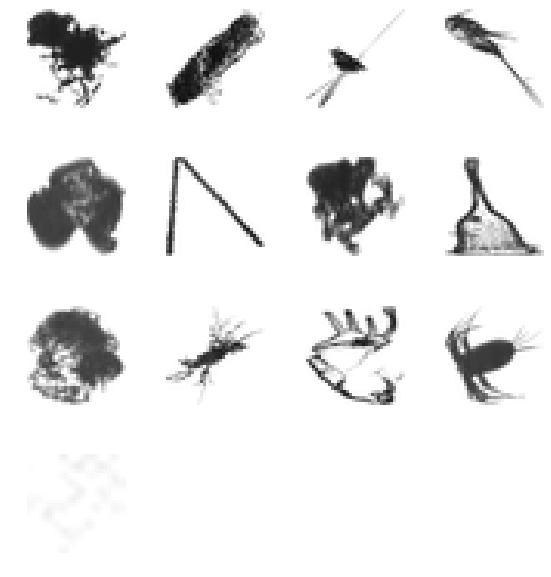

In [ ]:
# Plot some images after resizing
fig, axs = plt.subplots(4,4, figsize=(10, 10))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
print()
j = 0
for i, img in image_dict_resized.items():
    if i%20000 == 0:
        ax = axs[j]
        ax.imshow(img, cmap='gray', vmin=0, vmax=255)
        j += 1
        ax.axis('off')

# Remove the axes
fig.delaxes(axs[13])
fig.delaxes(axs[14])
fig.delaxes(axs[15])

In order to reshape the data into a correct form for proper classification, we will one-hot encode the level2 labels of the images.

In [ ]:
# Implement one-hot encoding on the target label
one_hot_encoded_labels = pd.get_dummies(metaDF['level2'])

# Identify the one-hot encoded result columns
one_hot_encoded_columns = one_hot_encoded_labels.columns

# Concatenate the columns
metaDF = pd.concat([metaDF, one_hot_encoded_labels], axis = 1)

Now, we will reshape our data intro a 4D-tensor of dimensions:
- Dataset Size
- Width
- Height
- Number of Channels

This form is the proper input for our neural network.

In [ ]:
trainDF, testDF = train_test_split(metaDF, test_size = 0.2, random_state = 43)
estimDF, valDF = train_test_split(trainDF, test_size = 0.2, random_state = 6)

test = np.zeros((len(testDF), width, height,1))
val = np.zeros((len(valDF), width, height,1))

for index, objid in enumerate(testDF.objid):
  test[index] = image_dict_resized[objid].reshape(width,height,1)
  
for index, objid in enumerate(valDF.objid):
  val[index] = image_dict_resized[objid].reshape(width,height,1)

It's now time to perfrom data augmentation as we will initialize an image data generator to enforce some variations to our images to make our neural network more robust to different image variations.

In [ ]:
# Define a function that returns image generators for the training data and validation data
def createDataGenerator():
    
    # Create a data augmentation object for the training data
    augmenter = krs.preprocessing.image.ImageDataGenerator(rotation_range = 45,
                                                           width_shift_range = 0.5,
                                                           height_shift_range = 0.5,
                                                           brightness_range = None,
                                                           shear_range = 30,
                                                           zoom_range = [0.7,1.1],
                                                           channel_shift_range = 0,
                                                           horizontal_flip = True,
                                                           vertical_flip = True)
    
    return augmenter

augmenter = createDataGenerator()

In [11]:
# Group the labels according to their frequency
classDistribution = estimDF.groupby('level2')['level2'].count().sort_values(ascending  = False)

classDistribution

level2
detritus                          88530
feces                             17213
Neoceratium                        8994
nauplii (Crustacea)                5912
badfocus (artefact)                5043
silks                              3618
Copepoda                           3355
Thalassionema                      3270
rods                               2625
multiple (other)                   2096
Codonellopsis (Dictyocystidae)     1825
Protoperidinium                    1471
Tintinnidiidae                     1399
Chaetoceros                        1399
Rhizosolenids                      1367
artefact                           1161
pollen                             1148
Codonaria                           533
chainlarge                          466
egg (other)                         450
Undellidae                          442
Hemiaulus                           441
Dinophysiales                       350
Dictyocysta                         340
Annelida                         

In [ ]:
# Implement bucketing for the classes according to the frequency
rareClasses = np.array(classDistribution[classDistribution <= 500].index)
lowFreqClasses = np.array(classDistribution[(classDistribution <= 2000) & (classDistribution > 500)].index)
freqClasses = np.array(classDistribution[(classDistribution <= 10000) & (classDistribution > 2000)].index)

In [ ]:
# Define the columns for the labels and object ID's of the augmented data
columns = ['objid']
columns.extend(one_hot_encoded_columns)
generatedDF = pd.DataFrame(columns = columns)


# Retrieve image generator for image data augmentation
imgGen = createDataGenerator()

rareDF = estimDF[estimDF.level2.isin(rareClasses)]

rare = np.array([image_dict_resized[objid] for objid in rareDF.objid])

rare = rare.reshape(rare.shape[0], width, height, 1)

imgGen.fit(rare)

index = len(metaDF)

num_batches = 200

for images, label in imgGen.flow(rare, rareDF[one_hot_encoded_columns], batch_size = len(rareDF)):
    if num_batches == 1:
        break

    augmentedBatch = np.column_stack((np.arange(index,index+len(rareDF)), label))
    
    for objid, img in zip(np.arange(index,index+len(rareDF)),images):
        image_dict_resized[objid] = img.reshape(width,height)
    
    generatedDF = generatedDF.append(pd.DataFrame(augmentedBatch, columns = columns))
    index += len(rareDF)
    num_batches -= 1
    
    
    
    
    
imgGen = createDataGenerator()

lowFreqDF = estimDF[estimDF.level2.isin(lowFreqClasses)]

lowFreq = np.array([image_dict_resized[objid] for objid in lowFreqDF.objid])

lowFreq = lowFreq.reshape(lowFreq.shape[0], width, height, 1)

imgGen.fit(lowFreq)

num_batches = 25

for images, label in imgGen.flow(lowFreq, lowFreqDF[one_hot_encoded_columns], batch_size = len(lowFreqDF)):
    
    if num_batches == 1:
        break
    
    augmentedBatch = np.column_stack((np.arange(index,index+len(lowFreqDF)), label))
    
    for objid, img in zip(np.arange(index,index+len(lowFreqDF)),images):
        image_dict_resized[objid] = img.reshape(width,height)
    
    generatedDF = generatedDF.append(pd.DataFrame(augmentedBatch, columns = columns))
    index += len(lowFreqDF)
    num_batches -= 1
    

    
    
imgGen = createDataGenerator()

freqDF = estimDF[estimDF.level2.isin(freqClasses)]

freq = np.array([image_dict_resized[objid] for objid in freqDF.objid])

freq = freq.reshape(freq.shape[0], width, height, 1)

imgGen.fit(freq)

num_batches = 5


for images, label in imgGen.flow(freq, freqDF[one_hot_encoded_columns], batch_size = len(freqDF)):
    
    if num_batches == 1:
        break
    
    augmentedBatch = np.column_stack((np.arange(index,index+len(freqDF)), label))
    
    for objid, img in zip(np.arange(index,index+len(freqDF)),images):
        image_dict_resized[objid] = img.reshape(width,height)
    
    generatedDF = generatedDF.append(pd.DataFrame(augmentedBatch, columns = columns))
    index += len(freqDF)
    num_batches -= 1
    

In [ ]:
augmentedDF = pd.concat([estimDF[columns], generatedDF[columns]], axis = 0)
del augmentedBatch
del generatedDF

In [15]:
augmentedDF[one_hot_encoded_columns].sum()

Annelida                          60800.0
Asterionellopsis                  15000.0
Bacteriastrum                      1400.0
Ceratocorys horrida               24800.0
Chaetoceros                       34975.0
Codonaria                         13325.0
Codonellopsis (Dictyocystidae)    45625.0
Copepoda                          16775.0
Coscinodiscids                    44000.0
Cyttarocylis                      13000.0
Dictyocysta                       68000.0
Dinophysiales                     70000.0
Hemiaulus                         88200.0
Lithodesmioides                    8000.0
Neoceratium                       44970.0
Odontella (Mediophyceae)          17800.0
Pleurosigma                       24400.0
Protoperidinium                   36775.0
Retaria                           32800.0
Rhabdonella                       44800.0
Rhizosolenids                     34175.0
Stenosemella                      45000.0
Thalassionema                     16350.0
Tintinnidiidae                    

In [ ]:
with open('augmentedDF.pkl', 'wb') as handle:
    pickle.dump(augmentedDF, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('augmentedDF.pkl', 'rb') as handle:
    augmentedDF = pickle.load(handle)

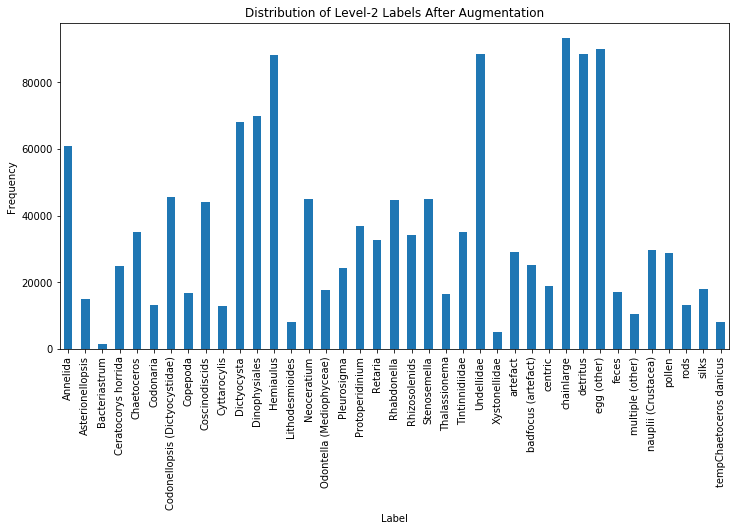

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

# Plot the cumulative distribution
augmentedDF[one_hot_encoded_columns].sum().plot(kind="bar")

    
ax.set_title('Distribution of Level-2 Labels After Augmentation of the training data')
ax.set_xlabel('Label')
ax.set_ylabel('Frequency')
ax.grid(False)
# ax.annotate(str(metaDF.level2.nunique())+' Labels', (15,75000), size = 20)
plt.show()

In [ ]:
smallEstimDF = augmentedDF.sample(frac = 0.2, random_state = 13)
# smallValDF = valDF.sample(frac = 0.2, random_state = 62)

smallEstim = np.array([image_dict_resized[objid] for objid in smallEstimDF.objid], dtype = np.float32)
# smallVal = np.array([image_dict_resized[objid] for objid in smallValDF.objid])

smallEstim = smallEstim.reshape(smallEstim.shape[0], width, height, 1)
# smallVal = smallVal.reshape(smallVal.shape[0], width, height, 1)

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

# Plot the cumulative distribution
smallEstimDF[one_hot_encoded_columns].sum().plot(kind="bar")

    
ax.set_title('Distribution of Level-2 Labels of small training dataset')
ax.set_xlabel('Label')
ax.set_ylabel('Frequency')
ax.grid(False)
# ax.annotate(str(metaDF.level2.nunique())+' Labels', (15,75000), size = 20)
plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

# Plot the cumulative distribution
valDF[one_hot_encoded_columns].sum().plot(kind="bar")

    
ax.set_title('Distribution of Level-2 Labels of the validation data')
ax.set_xlabel('Label')
ax.set_ylabel('Frequency')
ax.grid(False)
# ax.annotate(str(metaDF.level2.nunique())+' Labels', (15,75000), size = 20)
plt.show()

In [ ]:
with open('smallTrainDF.pkl', 'wb') as handle:
    pickle.dump(smallEstimDF, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('small_train.pkl', 'wb') as handle:
    pickle.dump(smallEstim, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('valDF.pkl', 'wb') as handle:
    pickle.dump(valDF, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('val.pkl', 'wb') as handle:
    pickle.dump(val, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('smallTrainDF.pkl', 'rb') as handle:
    smallEstimDF = pickle.load(handle)
    
with open('small_train.pkl', 'rb') as handle:
    smallEstim = pickle.load(handle)
    
with open('valDF.pkl', 'rb') as handle:
    valDF = pickle.load(handle)
    
with open('val.pkl', 'rb') as handle:
    val = pickle.load(handle)

In [22]:
print("Size of Estimation Samples is", len(augmentedDF))
print("Size of Validation Samples is", len(valDF))
print("Size of Test Samples is", len(testDF))

Size of Estimation Samples is 1399683
Size of Validation Samples is 38817
Size of Test Samples is 48522


## Task 3 - Model Selection

In [ ]:
def plot_results(history, modelname=''):
  
    loss_train = history.history['loss']
    loss_val = history.history['val_loss']
    f1_train = history.history['f1']
    f1_val = history.history['val_f1']
    
    fig = plt.figure(1)

    ax1 = plt.subplot(2, 1, 1)

    plt.plot(f1_train)
    plt.plot(f1_val)

    ax1.set_title('F-1 Score vs Epoch - '+modelname, size = 20)
    ax1.set_xlabel('Epoch', size = 20)
    ax1.set_ylabel('F-1 Score', size = 20)
    ax1.tick_params('both', labelsize = 20)
    ax1.legend(['Training Data', 'Validation Data'], prop={'size': 20})
    ax1.grid(False)

    ax2 = plt.subplot(2, 1, 2)

    plt.plot(loss_train)
    plt.plot(loss_val)

    ax2.set_title('Loss vs Epoch - '+modelname, size = 20)
    ax2.set_xlabel('Epoch', size = 20)
    ax2.set_ylabel('Loss', size = 20)
    ax2.tick_params('both', labelsize = 20)
    ax2.legend(['Training Data', 'Validation Data'], prop={'size': 20})
    ax2.grid(False)

    fig.set_size_inches(w=25,h=25)


    plt.show()

In [ ]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = krs.backend.sum(krs.backend.round(krs.backend.clip(y_true * y_pred, 0, 1)))
        possible_positives = krs.backend.sum(krs.backend.round(krs.backend.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + krs.backend.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = krs.backend.sum(krs.backend.round(krs.backend.clip(y_true * y_pred, 0, 1)))
        predicted_positives = krs.backend.sum(krs.backend.round(krs.backend.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + krs.backend.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+krs.backend.epsilon()))

In [ ]:
def LeNet(conv_filters = [(6,5),(16,5)],
          max_pools = [(2,2),(2,2)],
          hidden_layers=[120,84],
          lr = 0.1):
    
    classifier = krs.models.Sequential()

    classifier.add(krs.layers.Conv2D(filters = conv_filters[0][0],
                                     input_shape= (width, height, 1),
                                     kernel_size = conv_filters[0][1],
                                     activation='relu',
                                     use_bias=True))

    classifier.add(krs.layers.AveragePooling2D(pool_size=(max_pools[0][0], max_pools[0][0]),
                                            strides= (max_pools[0][1],max_pools[0][1]),
                                           padding = 'same'))
    
    
    
    for conv, maxPool in zip(conv_filters[1:], max_pools[1:]):
        classifier.add(krs.layers.Conv2D(filters = conv[0],
                                         kernel_size = conv[1],
                                         activation='relu',
                                         use_bias=True))

        classifier.add(krs.layers.AveragePooling2D(pool_size=(maxPool[0], maxPool[0]),
                                               strides= (maxPool[1],maxPool[1]),
                                               padding = 'same'))

    classifier.add(krs.layers.Flatten())

    for hidden in hidden_layers:
        classifier.add(krs.layers.Dense(units = hidden, activation='relu', use_bias=True))
        
    classifier.add(krs.layers.Dense(units = 39, activation='softmax', use_bias=True))

    opt = krs.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

    classifier.compile(optimizer = opt,
                       loss='categorical_crossentropy',
                       metrics=[f1, 'accuracy'])
    return classifier

In [25]:
epochs = 30
batchsize = 512


with tf.device('/gpu:0'):
  leNetClassifier = LeNet(lr = 0.0005)

  leNetHistory = leNetClassifier.fit(x=smallEstim, 
                           y=smallEstimDF[one_hot_encoded_columns],
                           batch_size=batchsize,
                           epochs=epochs, 
                           verbose=1, 
                           callbacks=None, 
                           validation_data=(val, valDF[one_hot_encoded_columns]), 
                           shuffle=True, 
                           class_weight=None, 
                           sample_weight=None, 
                           initial_epoch=0, 
                           steps_per_epoch=None, 
                           validation_steps=None)


Train on 279937 samples, validate on 38817 samples
Epoch 1/30
279937/279937 [==============================] - 7s 27us/step - loss: 3.7470 - f1: 0.0212 - acc: 0.1346 - val_loss: 2.0186 - val_f1: 0.3017 - val_acc: 0.4257
Epoch 2/30
279937/279937 [==============================] - 6s 23us/step - loss: 2.6108 - f1: 0.0696 - acc: 0.2354 - val_loss: 1.6947 - val_f1: 0.4243 - val_acc: 0.5260
Epoch 3/30
279937/279937 [==============================] - 6s 23us/step - loss: 2.4627 - f1: 0.1004 - acc: 0.2722 - val_loss: 1.5581 - val_f1: 0.4791 - val_acc: 0.5603
Epoch 4/30
279937/279937 [==============================] - 7s 25us/step - loss: 2.3726 - f1: 0.1275 - acc: 0.2970 - val_loss: 1.5707 - val_f1: 0.4534 - val_acc: 0.5561
Epoch 5/30
279937/279937 [==============================] - 7s 24us/step - loss: 2.3119 - f1: 0.1467 - acc: 0.3133 - val_loss: 1.4039 - val_f1: 0.5285 - val_acc: 0.5995
Epoch 6/30
279937/279937 [==============================] - 6s 23us/step - loss: 2.2608 - f1: 0.1704 - a

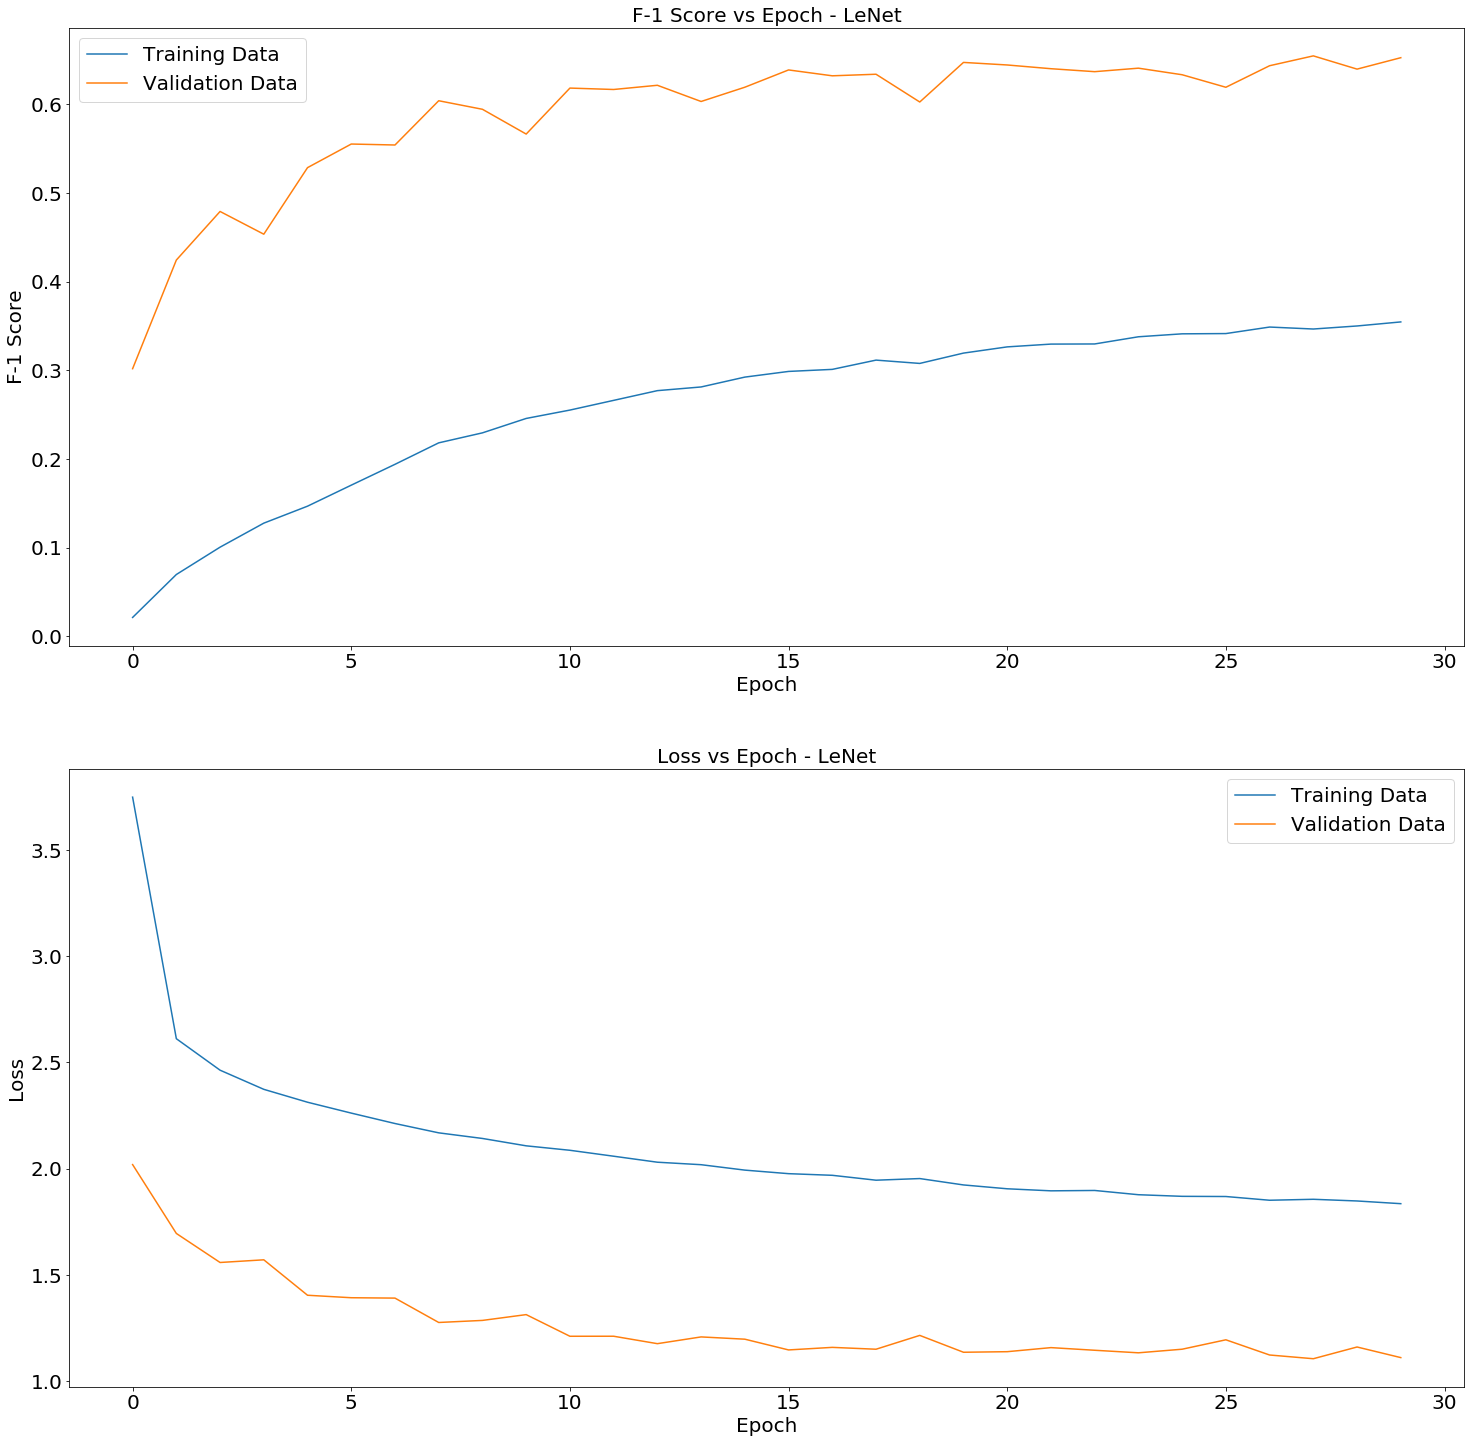

In [28]:
plot_results(leNetHistory, 'LeNet')

In [ ]:
def alexNet(  conv_filters1 = [(64,5),(128,3)],
            max_pools1 = [2,2],
            conv_filters2 = [(256,3),(128,3)],
            max_pools2 = [2],
            hidden_layers=[1024,1024],
            lr = 0.001):

    
    classifier = krs.models.Sequential()
    
    classifier.add(krs.layers.Conv2D(filters = conv_filters1[0][0],
                                     input_shape= (width, height, 1),
                                     kernel_size = conv_filters1[0][1],
                                     strides = 2,
                                     activation='relu'))

    classifier.add(krs.layers.MaxPooling2D(pool_size=max_pools1[0], strides=2))
    
    
    for conv, maxPool in zip(conv_filters1[1:],max_pools1[1:]):
        classifier.add(krs.layers.Conv2D(filters = conv[0],
                                         kernel_size = conv[1],
                                         strides=1,
                                         padding='same',
                                         activation='relu'))

        classifier.add(krs.layers.MaxPooling2D(pool_size=maxPool, strides=2))
    
    for conv in conv_filters2:
        classifier.add(krs.layers.Conv2D(filters = conv[0],
                                         kernel_size = conv[1],
                                         strides=1,
                                         padding='same',
                                         activation='relu'))
    for maxPool in max_pools2:
        classifier.add(krs.layers.MaxPooling2D(pool_size=maxPool, strides=2))

    classifier.add(krs.layers.Flatten())
    
    for hidden_layer in hidden_layers:
        classifier.add(krs.layers.Dense(units = hidden_layer, activation='relu'))
        classifier.add(krs.layers.Dropout(0.25))

    classifier.add(krs.layers.Dense(units = 39, activation='softmax'))

    opt = krs.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  
    classifier.compile(optimizer = opt,
                       loss='categorical_crossentropy',
                       metrics=[f1, 'accuracy'])
    return classifier

In [30]:
epochs = 30
batchsize = 512


with tf.device('/gpu:0'):
  alexNetClassifier = alexNet(lr = 0.0005)

  alexNetHistory = alexNetClassifier.fit(x=smallEstim, 
                           y=smallEstimDF[one_hot_encoded_columns],
                           batch_size=batchsize,
                           epochs=epochs, 
                           verbose=1, 
                           callbacks=None, 
                           validation_data=(val, valDF[one_hot_encoded_columns]), 
                           shuffle=True, 
                           class_weight=None, 
                           sample_weight=None, 
                           initial_epoch=0, 
                           steps_per_epoch=None, 
                           validation_steps=None)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 279937 samples, validate on 38817 samples
Epoch 1/30
279937/279937 [==============================] - 13s 48us/step - loss: 2.5387 - f1: 0.1096 - acc: 0.2567 - val_loss: 1.3460 - val_f1: 0.5526 - val_acc: 0.5973
Epoch 2/30
279937/279937 [==============================] - 12s 41us/step - loss: 2.0581 - f1: 0.2651 - acc: 0.3790 - val_loss: 1.1648 - val_f1: 0.5975 - val_acc: 0.6533
Epoch 3/30
279937/279937 [==============================] - 12s 41us/step - loss: 1.8525 - f1: 0.3538 - acc: 0.4366 - val_loss: 1.0097 - val_f1: 0.6611 - val_acc: 0.6851
Epoch 4/30
279937/279937 [==============================] - 11s 40us/step - loss: 1.7223 - f1: 0.4064 - acc: 0.4728 - val_loss: 1.0165 - val_f1: 0.6592 - val_acc: 0.6829
Epoch 5/30
279937/279937 [==============================] - 11s 41us/step - loss: 1.6210 - f1: 0.4445 - acc: 0.5013 - val_loss: 0.9041 - val_f1: 0.6916 - 

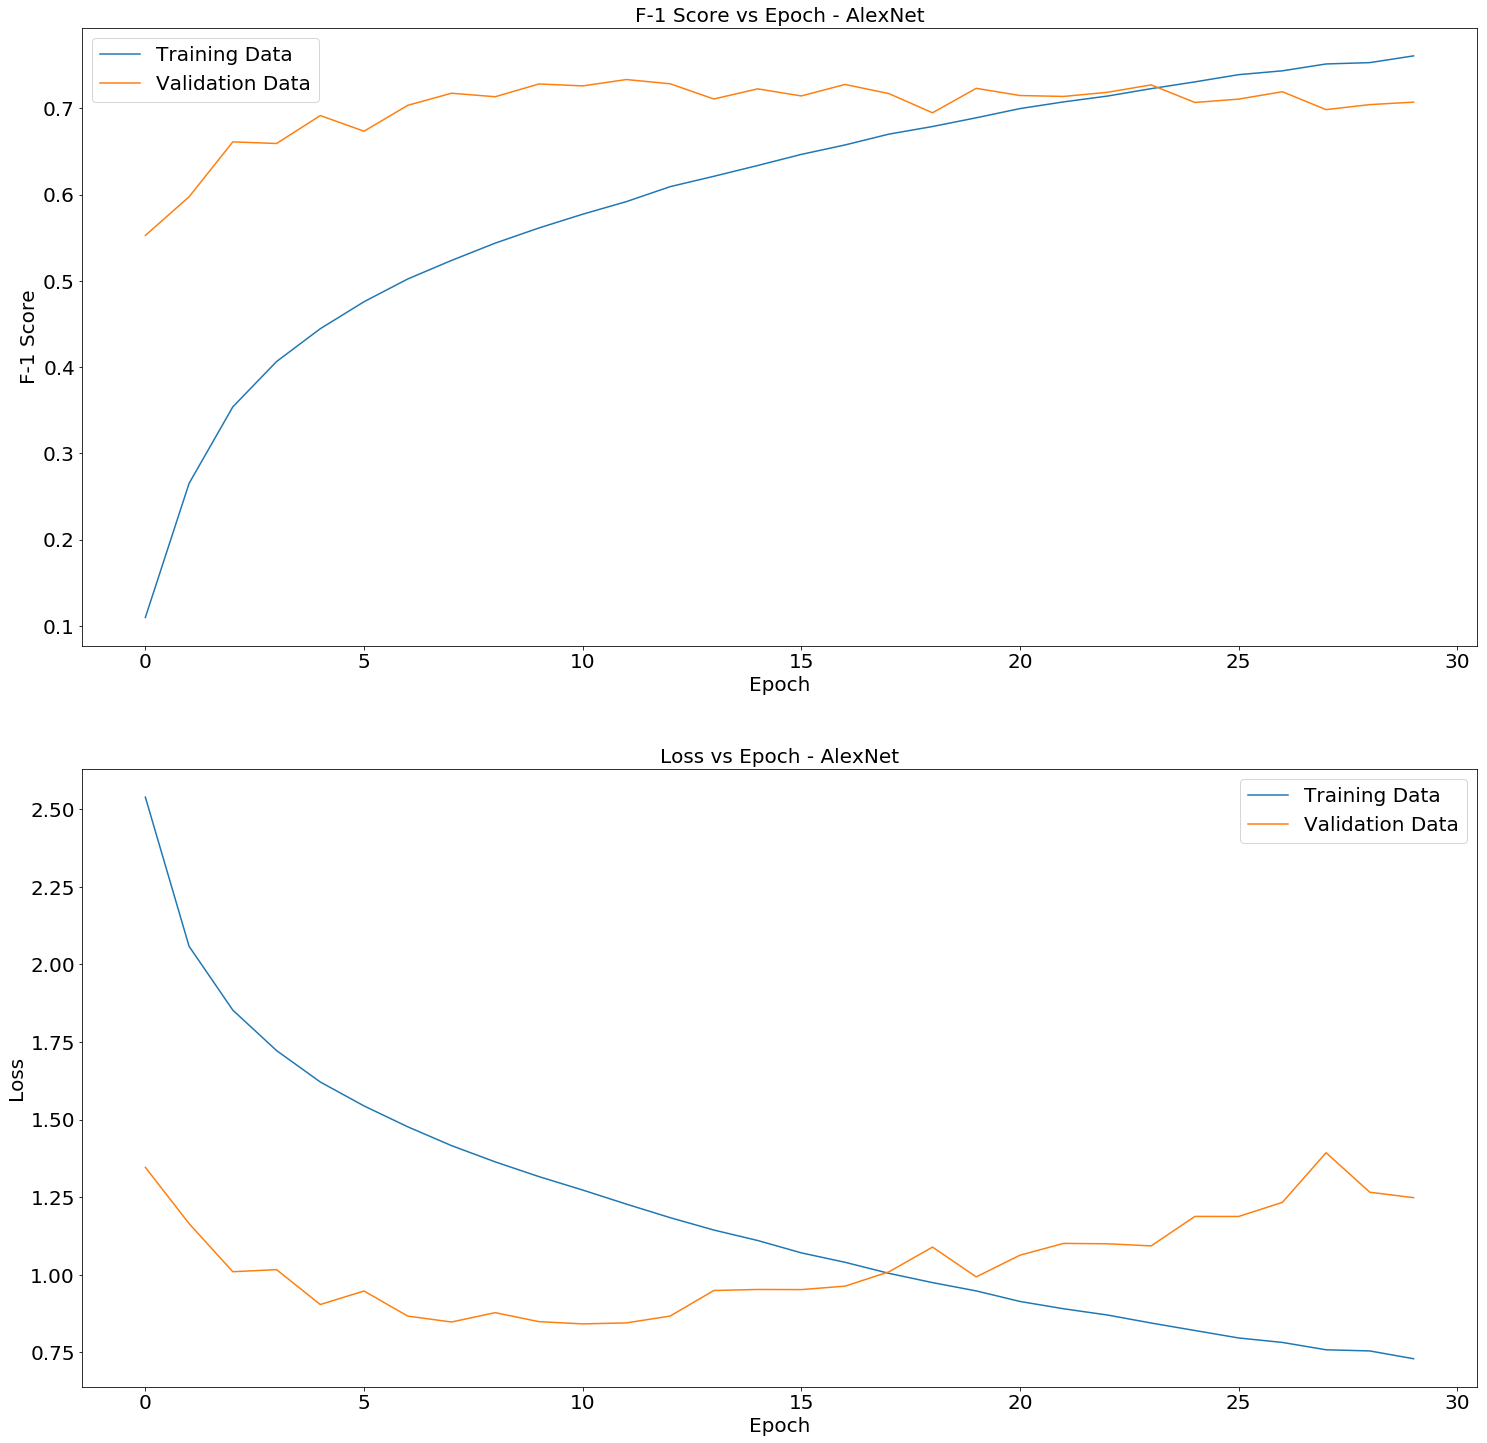

In [31]:
plot_results(alexNetHistory,'AlexNet')

In [ ]:
def VGGNet(conv_filters1 = [(64,3),(128,3)],
            conv_filters2 = [(256,3),(512,3),(512,3)],
            hidden_layers=[4096,4096],
           lr = 0.01):
    
    classifier = krs.models.Sequential()
    
    classifier.add(krs.layers.Conv2D(filters = conv_filters1[0][0],
                                 input_shape= (width, height, 1),
                                 kernel_size = conv_filters1[0][1],
                                 padding = 'same',
                                 activation='relu'))
    
    classifier.add(krs.layers.Conv2D(filters = conv_filters1[0][0],
                                 kernel_size = conv_filters1[0][1],
                                 padding = 'same',
                                 activation='relu'))
    
    classifier.add(krs.layers.MaxPooling2D(pool_size=2))

    
    for conv in conv_filters1[1:]:
        classifier.add(krs.layers.Conv2D(filters = conv[0],
                                         kernel_size = conv[1],
                                         padding = 'same',
                                         activation='relu'))
        
        classifier.add(krs.layers.Conv2D(filters = conv[0],
                                         input_shape= (width, height, 1),
                                         kernel_size = conv[1],
                                         padding = 'same',
                                         activation='relu'))

        classifier.add(krs.layers.MaxPooling2D(pool_size=2))
    
    for conv in conv_filters2:
        classifier.add(krs.layers.Conv2D(filters = conv[0],
                                         kernel_size = conv[1],
                                         padding = 'same',
                                         activation='relu'))
        
        classifier.add(krs.layers.Conv2D(filters = conv[0],
                                         kernel_size = conv[1],
                                         padding = 'same',
                                         activation='relu'))
        
        classifier.add(krs.layers.Conv2D(filters = conv[0],
                                         kernel_size = conv[1],
                                         padding = 'same',
                                         activation='relu'))
        
        classifier.add(krs.layers.MaxPooling2D(pool_size=2))        

    classifier.add(krs.layers.Flatten())
    
    for hidden_layer in hidden_layers:
        classifier.add(krs.layers.Dense(units = hidden_layer, activation='relu', use_bias=True))

    classifier.add(krs.layers.Dense(units = 39, activation='softmax', use_bias=True))

    opt = krs.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    classifier.compile(optimizer = opt,
                       loss='categorical_crossentropy',
                       metrics=[f1,'accuracy'])
    return classifier

In [33]:
epochs = 30
batchsize = 512


with tf.device('/gpu:0'):
  VGGclassifier = VGGNet(conv_filters1 = [(16,3),(32,3)],
                      conv_filters2 = [(64,3),(128,3),(128,3)],
                      hidden_layers=[1024,1024],
                      lr = 0.0005)

  VGGhistory = VGGclassifier.fit(x=smallEstim, 
                           y=smallEstimDF[one_hot_encoded_columns],
                           batch_size=batchsize,
                           epochs=epochs, 
                           verbose=1, 
                           callbacks=None, 
                           validation_data=(val, valDF[one_hot_encoded_columns]), 
                           shuffle=True, 
                           class_weight=None, 
                           sample_weight=None, 
                           initial_epoch=0, 
                           steps_per_epoch=None, 
                           validation_steps=None)


Train on 279937 samples, validate on 38817 samples
Epoch 1/30
279937/279937 [==============================] - 24s 86us/step - loss: 2.6466 - f1: 0.0743 - acc: 0.2227 - val_loss: 1.5207 - val_f1: 0.5015 - val_acc: 0.5609
Epoch 2/30
279937/279937 [==============================] - 21s 77us/step - loss: 2.1641 - f1: 0.2061 - acc: 0.3408 - val_loss: 1.1987 - val_f1: 0.6118 - val_acc: 0.6344
Epoch 3/30
279937/279937 [==============================] - 21s 77us/step - loss: 1.9614 - f1: 0.2928 - acc: 0.3991 - val_loss: 1.0743 - val_f1: 0.6368 - val_acc: 0.6661
Epoch 4/30
279937/279937 [==============================] - 22s 77us/step - loss: 1.8017 - f1: 0.3667 - acc: 0.4459 - val_loss: 1.0117 - val_f1: 0.6730 - val_acc: 0.6829
Epoch 5/30
279937/279937 [==============================] - 22s 79us/step - loss: 1.6728 - f1: 0.4208 - acc: 0.4839 - val_loss: 1.0005 - val_f1: 0.6658 - val_acc: 0.6780
Epoch 6/30
279937/279937 [==============================] - 22s 77us/step - loss: 1.5748 - f1: 0.46

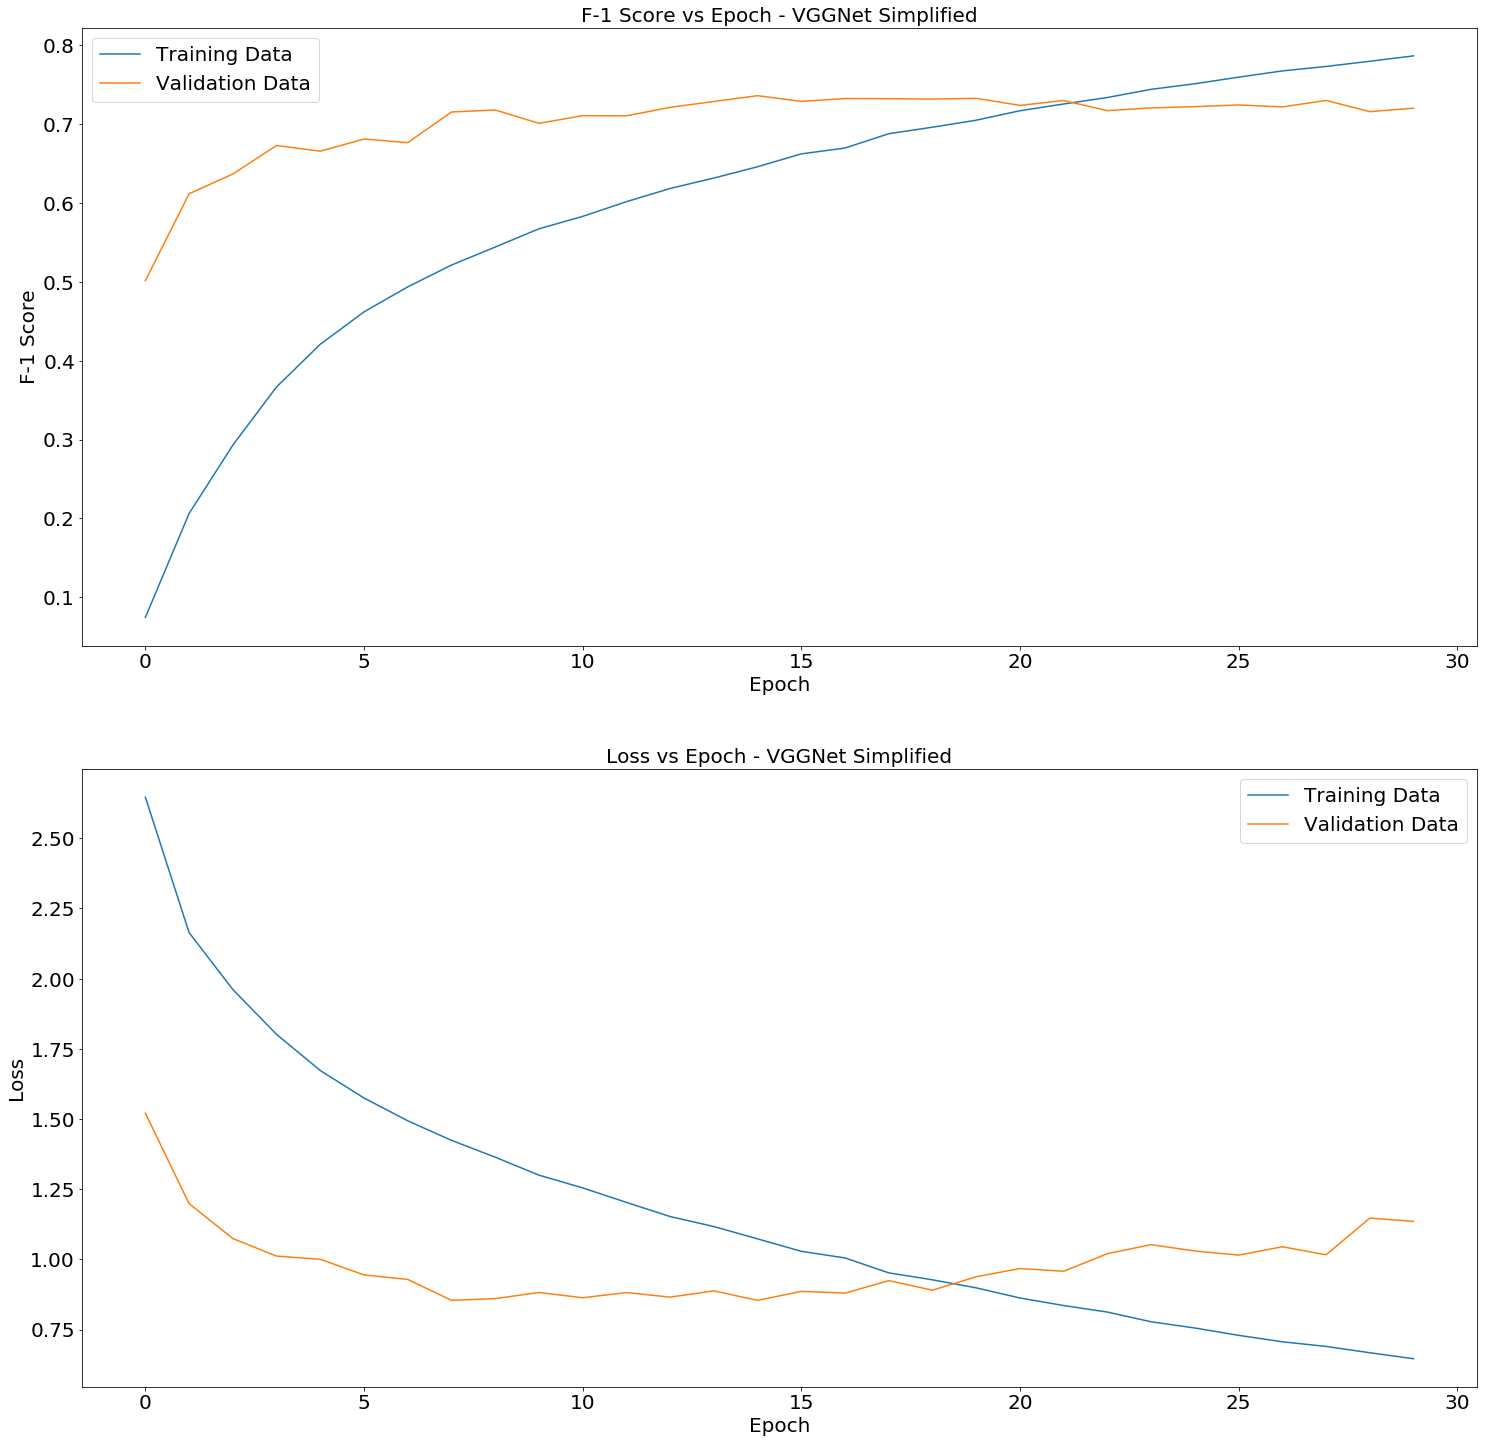

In [34]:
plot_results(VGGhistory,'VGGNet Simplified')

In [35]:
epochs = 30
batchsize = 512


with tf.device('/gpu:0'):
  VGGclassifier2 = VGGNet(conv_filters1 = [(64,3),(128,3)],
                      conv_filters2 = [(256,3),(512,3),(512,3)],
                      hidden_layers=[4096,4096],
                      lr = 0.0005)

  VGGhistory2 = VGGclassifier2.fit(x=smallEstim, 
                           y=smallEstimDF[one_hot_encoded_columns],
                           batch_size=batchsize,
                           epochs=epochs, 
                           verbose=1, 
                           callbacks=None, 
                           validation_data=(val, valDF[one_hot_encoded_columns]), 
                           shuffle=True, 
                           class_weight=None, 
                           sample_weight=None, 
                           initial_epoch=0, 
                           steps_per_epoch=None, 
                           validation_steps=None)


Train on 279937 samples, validate on 38817 samples
Epoch 1/30
279937/279937 [==============================] - 133s 476us/step - loss: 2.7778 - f1: 0.0523 - acc: 0.1985 - val_loss: 1.4155 - val_f1: 0.5315 - val_acc: 0.5870
Epoch 2/30
279937/279937 [==============================] - 119s 424us/step - loss: 2.1288 - f1: 0.2255 - acc: 0.3518 - val_loss: 1.2814 - val_f1: 0.5665 - val_acc: 0.5973
Epoch 3/30
279937/279937 [==============================] - 119s 423us/step - loss: 1.8541 - f1: 0.3507 - acc: 0.4347 - val_loss: 1.0875 - val_f1: 0.6236 - val_acc: 0.6723
Epoch 4/30
279937/279937 [==============================] - 118s 423us/step - loss: 1.5700 - f1: 0.4699 - acc: 0.5173 - val_loss: 0.8840 - val_f1: 0.7033 - val_acc: 0.7148
Epoch 5/30
279937/279937 [==============================] - 119s 424us/step - loss: 1.3756 - f1: 0.5456 - acc: 0.5718 - val_loss: 0.8027 - val_f1: 0.7271 - val_acc: 0.7371
Epoch 6/30
279937/279937 [==============================] - 118s 423us/step - loss: 1.236

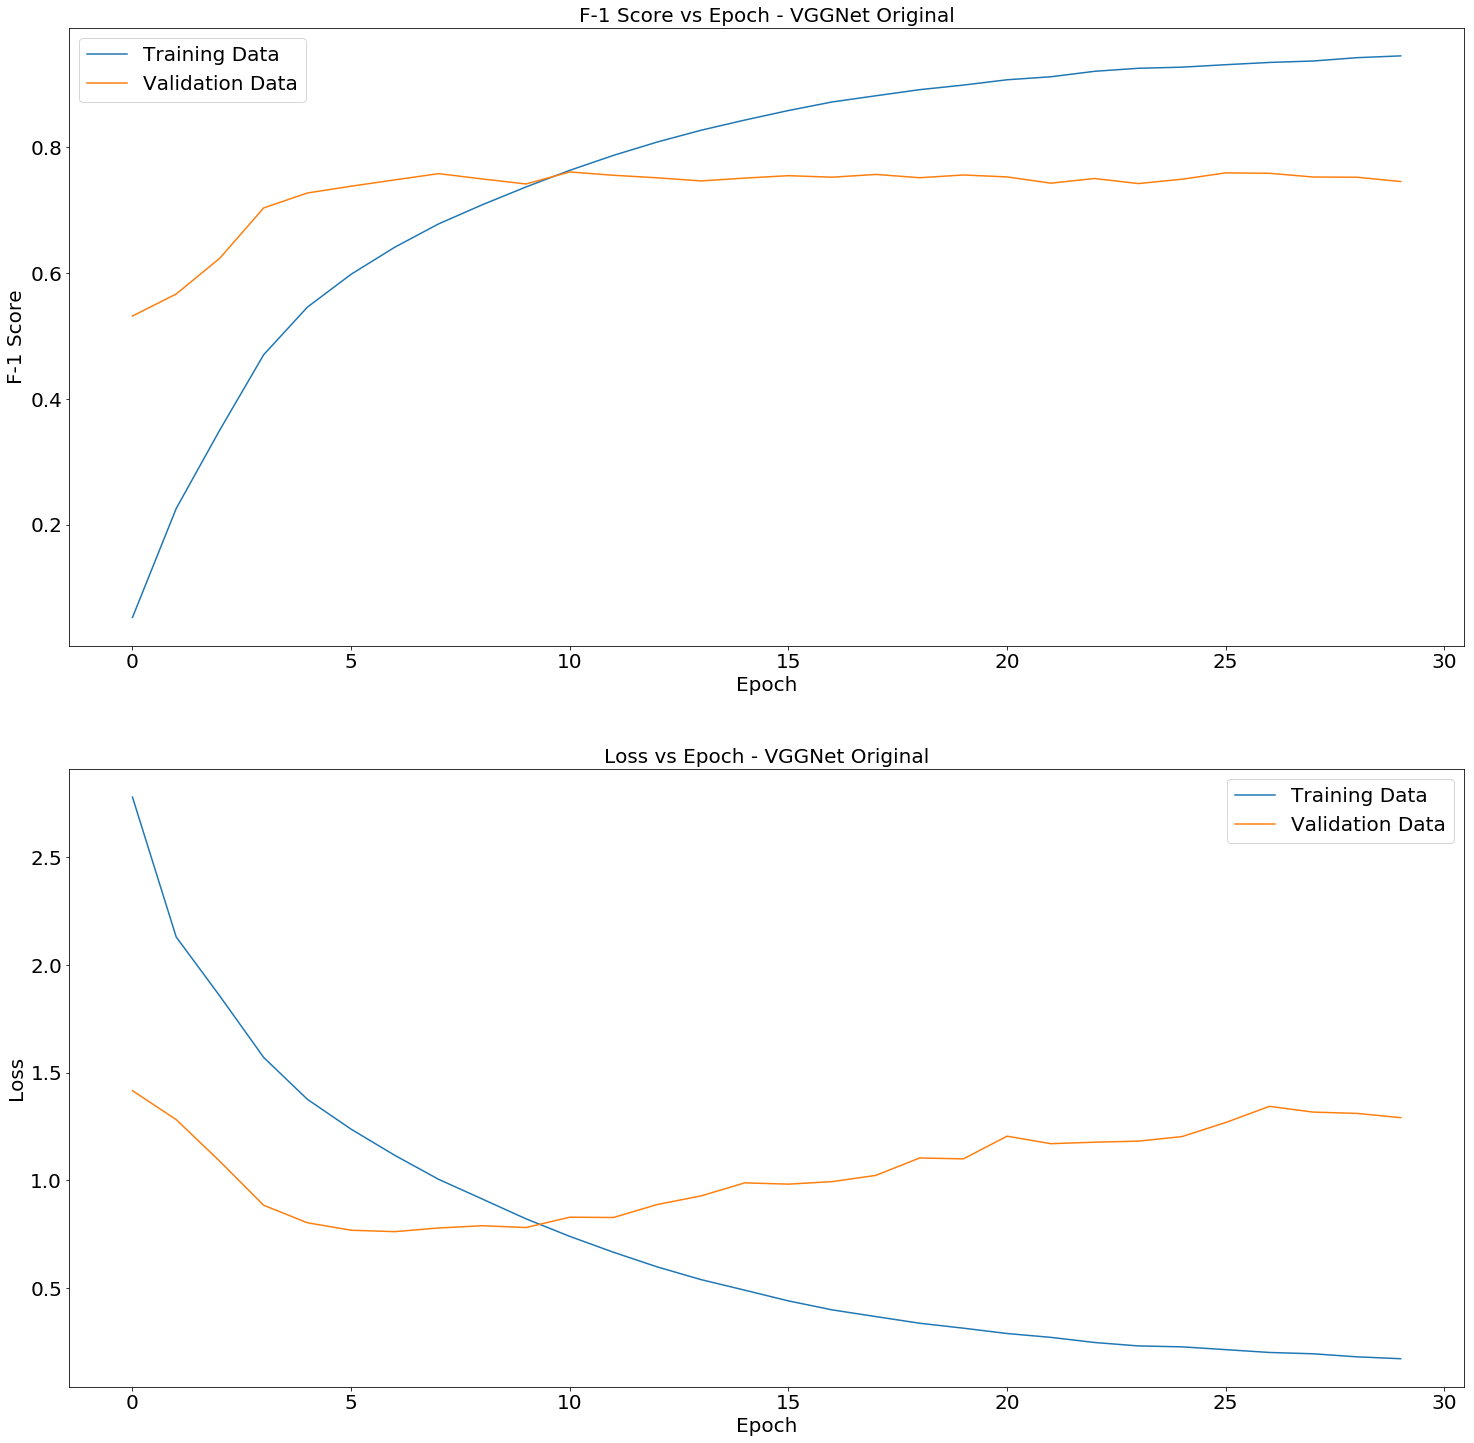

In [36]:
plot_results(VGGhistory2, 'VGGNet Original')

In [ ]:
def _after_conv(in_tensor):
    norm = krs.layers.BatchNormalization()(in_tensor)
    return krs.layers.Activation('relu')(norm)

def conv1(in_tensor, filters):
    conv = krs.layers.Conv2D(filters, kernel_size=1, strides=1)(in_tensor)
    return _after_conv(conv)

def conv1_downsample(in_tensor, filters):
    conv = krs.layers.Conv2D(filters, kernel_size=1, strides=2)(in_tensor)
    return _after_conv(conv)

def conv3(in_tensor, filters):
    conv = krs.layers.Conv2D(filters, kernel_size=3, strides=1, padding='same')(in_tensor)
    return _after_conv(conv)

def conv3_downsample(in_tensor, filters):
    conv = krs.layers.Conv2D(filters, kernel_size=3, strides=2, padding='same')(in_tensor)
    return _after_conv(conv)

def resnet_block_wo_bottlneck(in_tensor, filters, downsample=False):
    if downsample:
        conv1_rb = conv3_downsample(in_tensor, filters)
    else:
        conv1_rb = conv3(in_tensor, filters)
    conv2_rb = conv3(conv1_rb, filters)

    if downsample:
        in_tensor = conv1_downsample(in_tensor, filters)
    result = krs.layers.Add()([conv2_rb, in_tensor])

    return krs.layers.Activation('relu')(result)

def resnet_block_w_bottlneck(in_tensor,
                             filters,
                             downsample=False,
                             change_channels=False):
    if downsample:
        conv1_rb = conv1_downsample(in_tensor, int(filters/4))
    else:
        conv1_rb = conv1(in_tensor, int(filters/4))
    conv2_rb = conv3(conv1_rb, int(filters/4))
    conv3_rb = conv1(conv2_rb, filters)

    if downsample:
        in_tensor = conv1_downsample(in_tensor, filters)
    elif change_channels:
        in_tensor = conv1(in_tensor, filters)
    result = krs.layers.Add()([conv3_rb, in_tensor])

    return result

def _pre_res_blocks(in_tensor, filters = 64, filter_size = 7):
    conv = krs.layers.Conv2D(filters, filter_size, strides=2, padding='same')(in_tensor)
    conv = _after_conv(conv)
    pool = krs.layers.MaxPool2D(3, 2, padding='same')(conv)
    return pool

def _post_res_blocks(in_tensor, n_classes):
    pool = krs.layers.GlobalAvgPool2D()(in_tensor)
    preds = krs.layers.Dense(n_classes, activation='softmax')(pool)
    return preds

def convx_wo_bottleneck(in_tensor, filters, n_times, downsample_1=False):
    res = in_tensor
    for i in range(n_times):
        if i == 0:
            res = resnet_block_wo_bottlneck(res, filters, downsample_1)
        else:
            res = resnet_block_wo_bottlneck(res, filters)
    return res

def convx_w_bottleneck(in_tensor, filters, n_times, downsample_1=False):
    res = in_tensor
    for i in range(n_times):
        if i == 0:
            res = resnet_block_w_bottlneck(res, filters, downsample_1, not downsample_1)
        else:
            res = resnet_block_w_bottlneck(res, filters)
    return res

def _resnet(in_shape=(32,32,1),
            n_classes=39,
            opt='adam',
            convx=[64, 64, 128, 256, 512],
            n_convx=[7, 2, 2, 2, 2],
            convx_fn=convx_wo_bottleneck,
            lr = 0.001):
    in_layer = krs.layers.Input(in_shape)

    downsampled = _pre_res_blocks(in_layer, convx[0], n_convx[0])

    conv2x = convx_fn(downsampled, convx[1], n_convx[1])
    conv3x = convx_fn(conv2x, convx[2], n_convx[2], True)
    conv4x = convx_fn(conv3x, convx[3], n_convx[3], True)
    conv5x = convx_fn(conv4x, convx[4], n_convx[4], True)

    preds = _post_res_blocks(conv5x, n_classes)

    model = krs.models.Model(in_layer, preds)
    
    opt = krs.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

    model.compile(loss="categorical_crossentropy", optimizer=opt,
	              metrics=[f1,'accuracy'])
    return model

def resnet18(in_shape=(32,32,1), n_classes=39, opt='adam', lr = 0.001):
    return _resnet(in_shape, n_classes, opt, lr = lr)

def resnet34(in_shape=(32,32,1), n_classes=39, opt='adam', lr = 0.001):
    return _resnet(in_shape,
                  n_classes,
                  opt,
                  n_convx=[7, 3, 4, 6, 3],
                  lr = lr)

def resnet50(in_shape=(32,32,1), n_classes=39, opt='adam', lr = 0.001):
    return _resnet(in_shape,
                  n_classes,
                  opt,
                  [64, 256, 512, 1024, 2048],
                  [7, 3, 4, 6, 3],
                  convx_w_bottleneck,
                  lr = lr)

def resnet101(in_shape=(32,32,1), n_classes=39, opt='adam', lr = 0.001):
    return _resnet(in_shape,
                  n_classes,
                  opt,
                  [64, 256, 512, 1024, 2048],
                  [7, 3, 4, 23, 3],
                  convx_w_bottleneck,
                  lr = lr)

def resnet152(in_shape=(32,32,1), n_classes=39, opt='adam', lr = 0.001):
    return _resnet(in_shape,
                  n_classes,
                  opt,
                  [64, 256, 512, 1024, 2048],
                  [7, 3, 8, 36, 3],
                  convx_w_bottleneck,
                  lr = lr)

In [ ]:
epochs = 25
batchsize = 512


with tf.device('/gpu:0'):
  resNet18classifier = resnet18(lr = 0.0005)

  resNet18history = resNet18classifier.fit(x=smallEstim, 
                           y=smallEstimDF[one_hot_encoded_columns],
                           batch_size=batchsize,
                           epochs=epochs, 
                           verbose=1, 
                           callbacks=None, 
                           validation_data=(val, valDF[one_hot_encoded_columns]), 
                           shuffle=True, 
                           class_weight=None, 
                           sample_weight=None, 
                           initial_epoch=0, 
                           steps_per_epoch=None, 
                           validation_steps=None)


In [ ]:
plot_results(resNet18history, 'ResNet-18')

In [ ]:
epochs = 25
batchsize = 128


with tf.device('/gpu:0'):
  resNet50classifier = resnet50(lr = 0.0005)

  resNet50history = resNet50classifier.fit(x=smallEstim, 
                           y=smallEstimDF[one_hot_encoded_columns],
                           batch_size=batchsize,
                           epochs=epochs, 
                           verbose=1, 
                           callbacks=None, 
                           validation_data=(val, valDF[one_hot_encoded_columns]), 
                           shuffle=True, 
                           class_weight=None, 
                           sample_weight=None, 
                           initial_epoch=0, 
                           steps_per_epoch=None, 
                           validation_steps=None)


In [ ]:
plot_results(resNet50history, 'ResNet-50')

### Train on the whole Dataset

In [ ]:
epochs = 40
batch_size = 256


with tf.device('/gpu:0'):
  classifier = VGGNet(conv_filters1 = [(16,3),(32,3)],
                      conv_filters2 = [(64,3),(128,3),(128,3)],
                      hidden_layers=[1024,1024],
                      lr = 0.0005)


  history = classifier.fit(x=estim, 
                           y=estimDF[one_hot_encoded_columns],
                           batch_size=batchsize,
                           epochs=epochs, 
                           verbose=1, 
                           callbacks=None, 
                           validation_data=(val, valDF[one_hot_encoded_columns]), 
                           shuffle=True, 
                           class_weight=None, 
                           sample_weight=None, 
                           initial_epoch=0, 
                           steps_per_epoch=None, 
                           validation_steps=None)


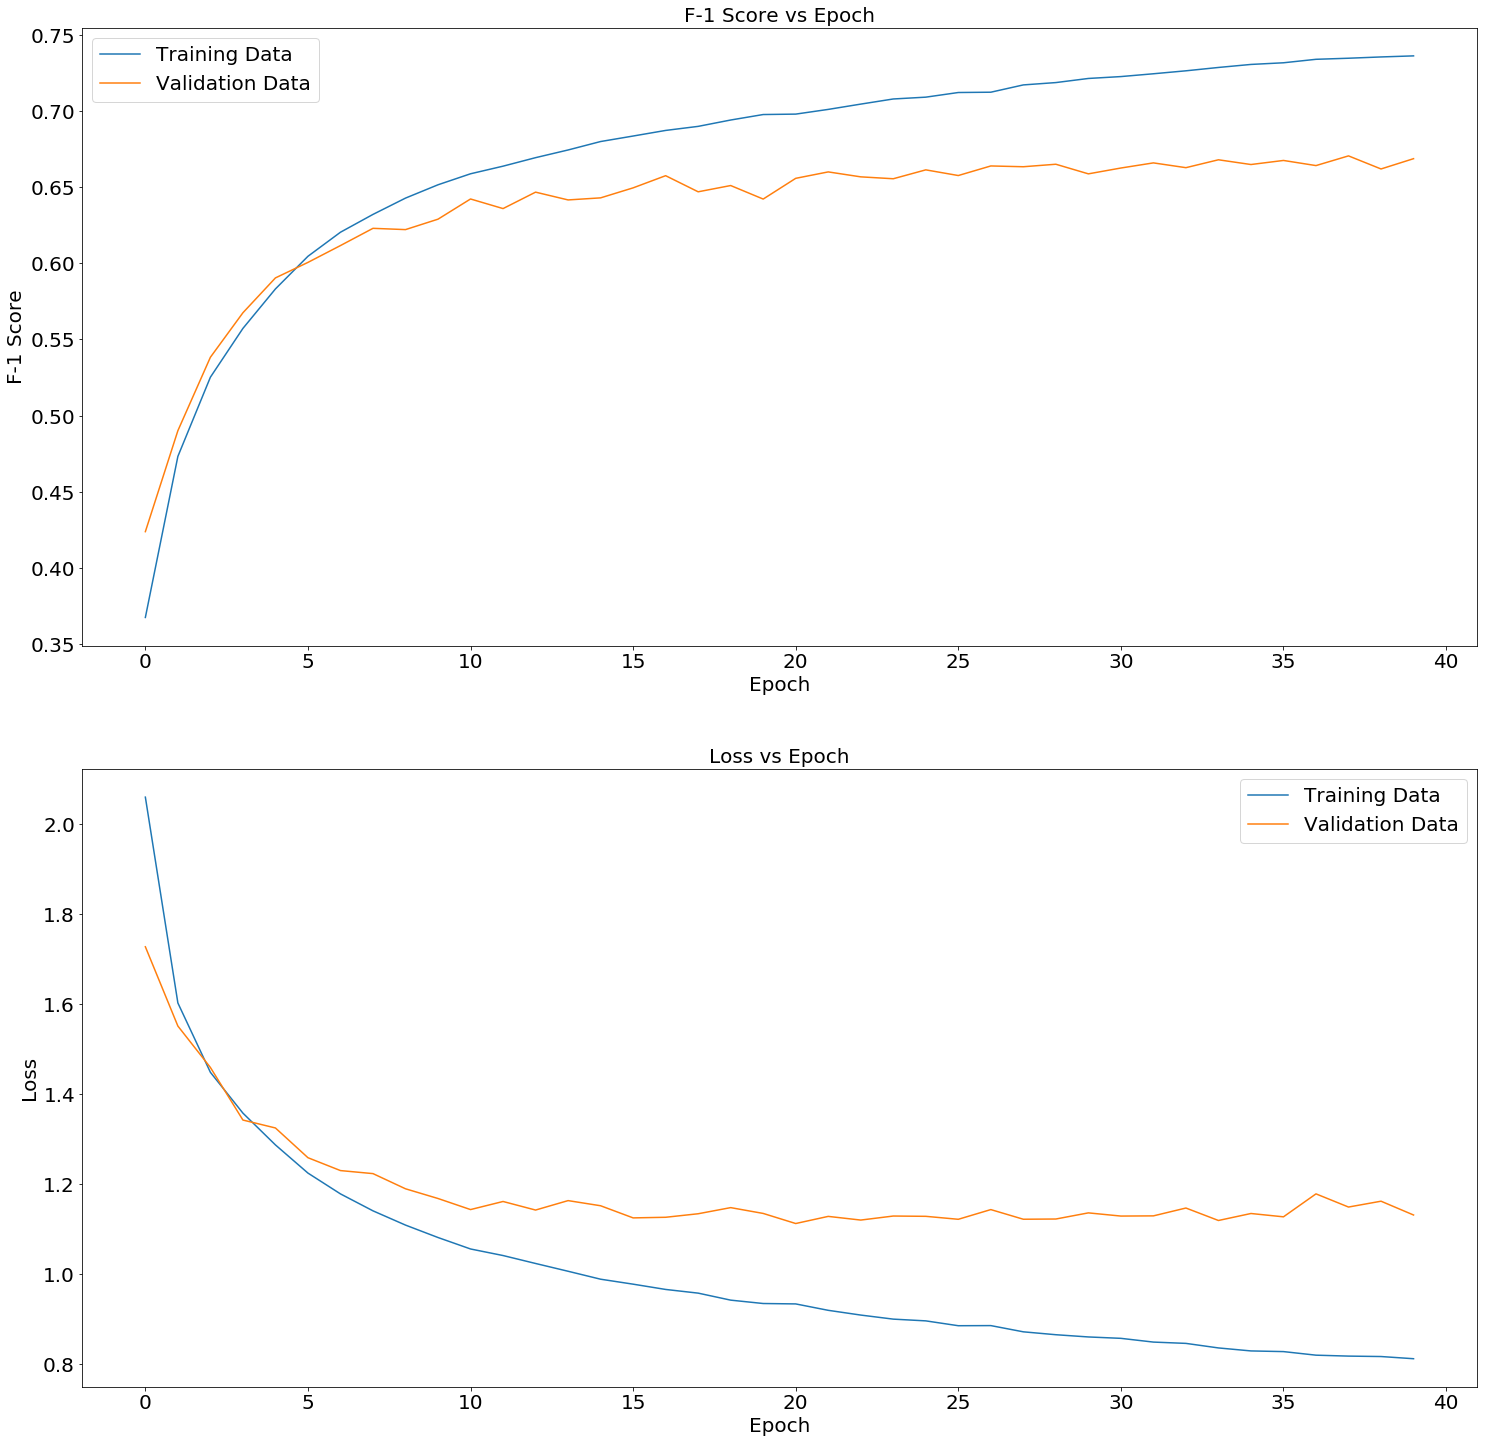

In [94]:
plot_results(history)

In [ ]:
  preds = classifier.predict(test)
  
  targets = np.array([ np.argmax(t) for t in testDF[one_hot_encoded_columns].values ])
  predictions = preds.argmax(axis = 1)

In [ ]:
def plot_confusion(classifier, targets, predictions):

  conf_mat = confusion_matrix(targets, predictions)
  df_cm = pd.DataFrame(conf_mat, range(39), range(39))

  fig, ax = plt.subplots(figsize=(25,25))

  sns.heatmap(df_cm,
            xticklabels=one_hot_encoded_columns.values,
            yticklabels=one_hot_encoded_columns.values,
            vmin = 1,
            cmap = "YlGnBu",
            ax = ax)

  bar_color = ax.collections[0].colorbar
  bar_color.set_ticks(np.arange(0,25000,2500))

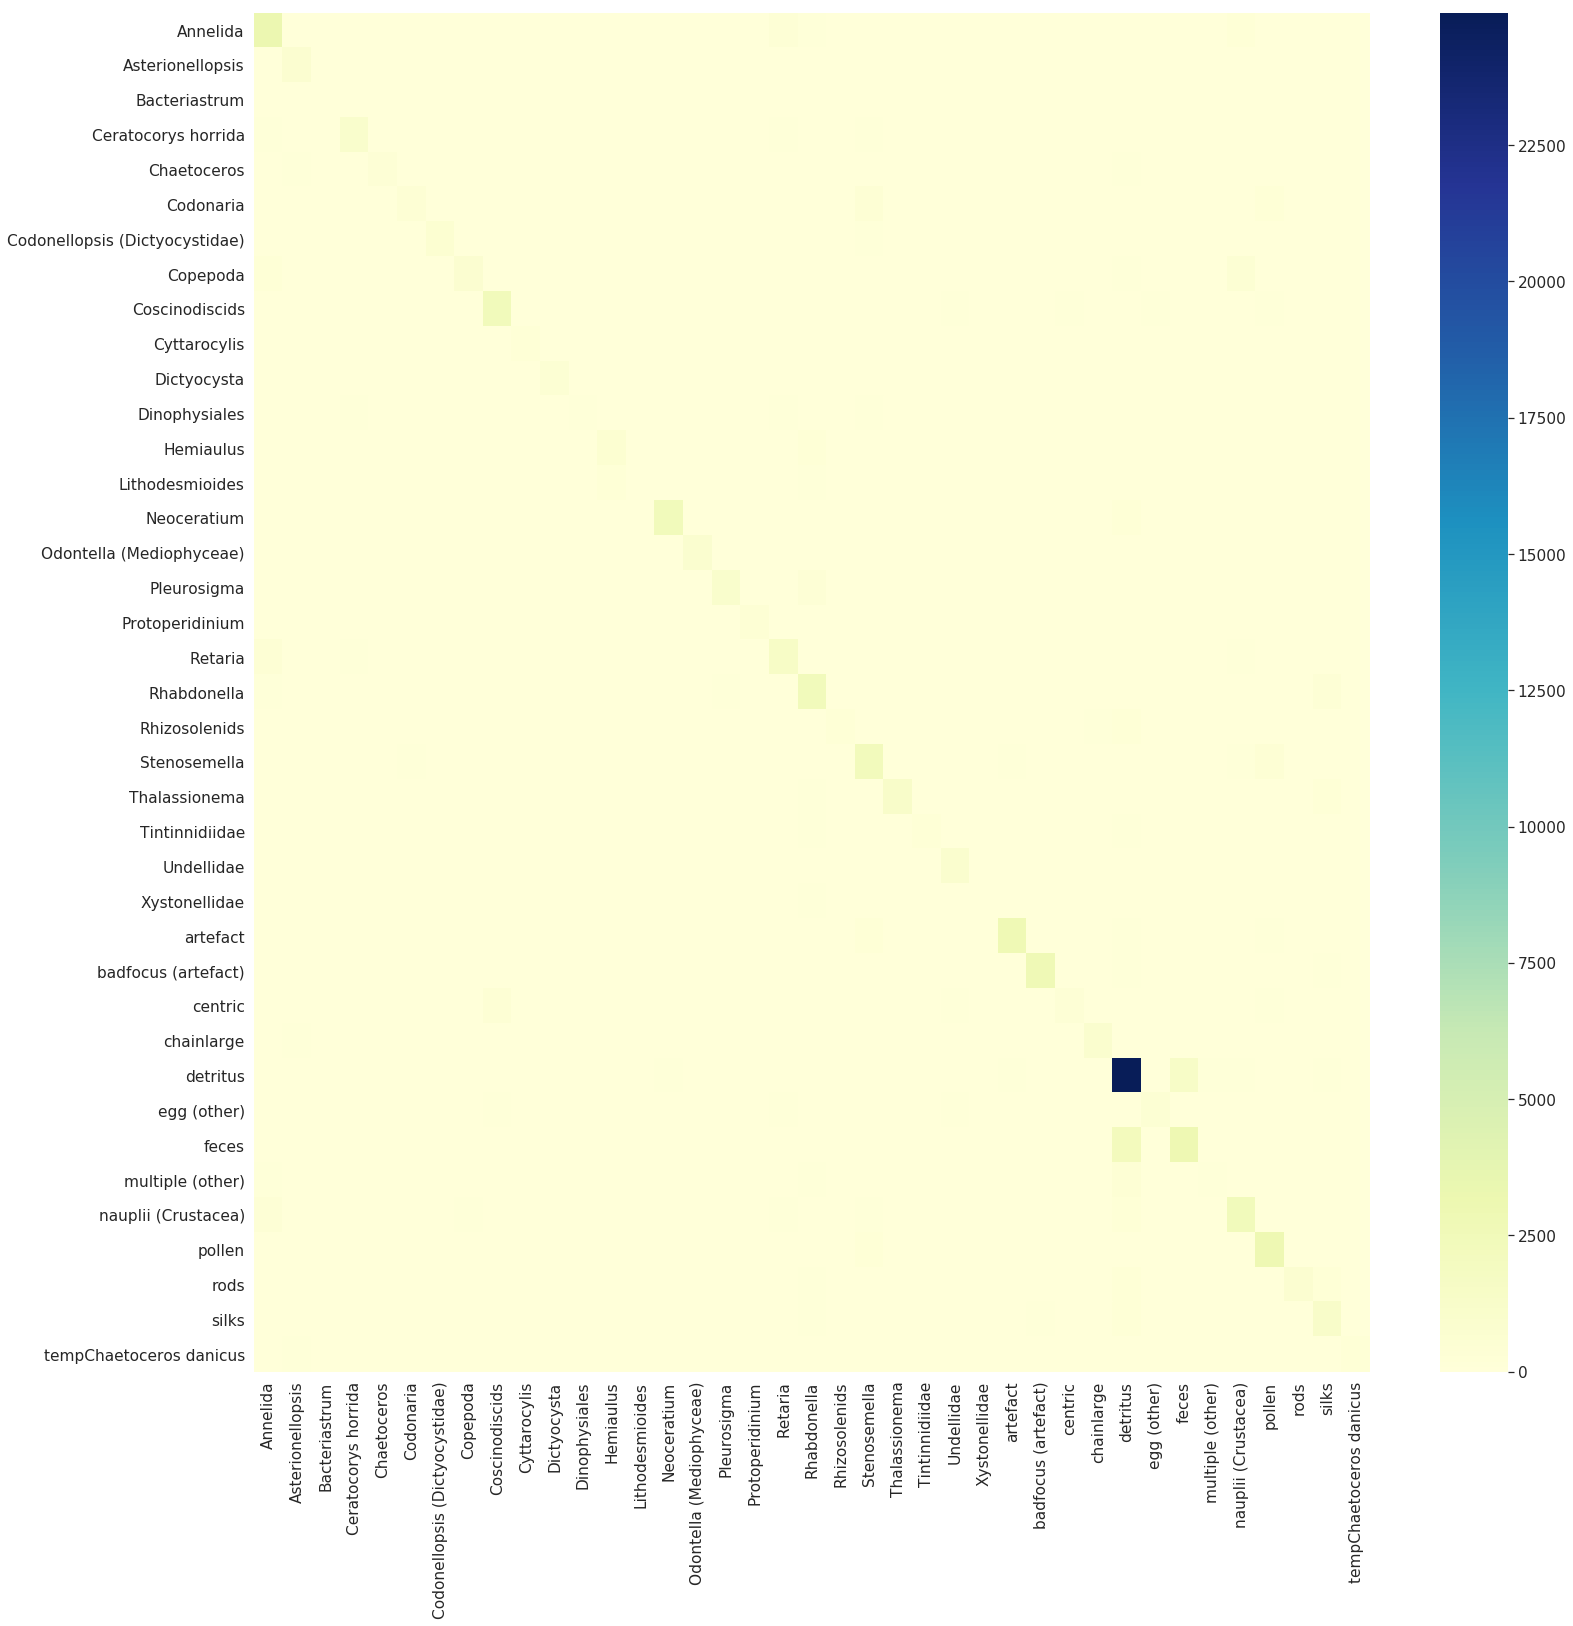

In [188]:
plot_confusion(classifier, targets, predictions)

In [189]:
f1_score(targets, predictions, average='macro')

0.5168745937780006

In [ ]:
epochs = 30
batch_size = 512


with tf.device('/gpu:0'):
  classifier = resnet18(lr = 0.001)


  history = classifier.fit(x=train, 
                           y=trainDF[one_hot_encoded_columns],
                           batch_size=batch_size,
                           epochs=epochs, 
                           verbose=1, 
                           callbacks=None, 
                           validation_split=0.2, 
                           validation_data=None, 
                           shuffle=True, 
                           class_weight=None, 
                           sample_weight=None, 
                           initial_epoch=0, 
                           steps_per_epoch=None, 
                           validation_steps=None)


In [ ]:
  preds = classifier.predict(test)
  
  targets = np.array([ np.argmax(t) for t in testDF[one_hot_encoded_columns].values ])
  predictions = preds.argmax(axis = 1)

In [198]:
f1_score(targets, predictions, average='macro')

0.48545720809569715